<a href="https://colab.research.google.com/github/Ganapathisubramaniyan/Ganapathisubramaniyan/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

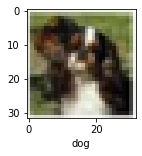

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(500, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8716 - accuracy: 0.3313
Epoch 2/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6805 - accuracy: 0.4056
Epoch 3/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5967 - accuracy: 0.4347
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5403 - accuracy: 0.4561
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4954 - accuracy: 0.4722


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.31      0.42      1000
           1       0.73      0.45      0.56      1000
           2       0.28      0.45      0.34      1000
           3       0.38      0.23      0.28      1000
           4       0.44      0.24      0.31      1000
           5       0.42      0.30      0.35      1000
           6       0.29      0.87      0.44      1000
           7       0.64      0.41      0.50      1000
           8       0.63      0.60      0.61      1000
           9       0.63      0.51      0.56      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.44     10000
weighted avg       0.50      0.44      0.44     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4598 - accuracy: 0.4792
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.1089 - accuracy: 0.6099
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9861 - accuracy: 0.6591
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9037 - accuracy: 0.6872
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8365 - accuracy: 0.7099
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7774 - accuracy: 0.7320
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7256 - accuracy: 0.7470
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6861 - accuracy: 0.7603
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6413 - accuracy: 0.7754
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72      1000
           1       0.80      0.85      0.82      1000
           2       0.59      0.55      0.57      1000
           3       0.61      0.36      0.45      1000
           4       0.58      0.75      0.65      1000
           5       0.57      0.68      0.62      1000
           6       0.83      0.71      0.77      1000
           7       0.79      0.69      0.74      1000
           8       0.75      0.84      0.79      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
classes[y_classes[5]]

'frog'

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

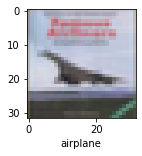

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[4]]

'deer'